In [18]:
import scanpy as sc
import decoupler as dc
import anndata as ad

adata = ad.read_h5ad("/home/larissa/Documents/LR2TF_HiWi/decoupler_test/anndata_object.h5ad")
print(adata)

net = dc.get_collectri(organism='human', split_complexes=False)
print(net)

dc.run_ulm(
    mat=adata,
    net=net,
    source='source',
    target='target',
    weight='weight',
    verbose=True,
    use_raw = False
)

acts = dc.get_acts(adata, obsm_key='ulm_estimate')


df = dc.rank_sources_groups(acts, groupby='seurat_clusters', reference='rest', method='t-test_overestim_var')
print(adata.obs["seurat_clusters"])

AnnData object with n_obs × n_vars = 160 × 8674
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.0.5', 'seurat_clusters'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_umap'
       source          target  weight  \
0         MYC            TERT       1   
1        SPI1           BGLAP       1   
2       SMAD3             JUN       1   
3       SMAD4             JUN       1   
4      STAT5A             IL2       1   
...       ...             ...     ...   
43173    NFKB  hsa-miR-143-3p       1   
43174     AP1     hsa-miR-206       1   
43175    NFKB   hsa-miR-21-5p       1   
43176    NFKB  hsa-miR-224-5p       1   
43177     AP1     hsa-miR-144       1   

                                                    PMID  
0      10022128;10491298;10606235;10637317;10723141;1...  
1                                               10022617  
2                                      10022869;12374795  
3       

100%|██████████| 1/1 [00:00<00:00, 74.83it/s]


AAACATACAACCAC-1    2
AAACGCTGTTTCTG-1    5
AACCTTTGGACGGA-1    0
AACGCCCTCGTACA-1    6
AACGTCGAGTATCG-1    6
                   ..
TTGGTACTACTGGT-1    1
TTGTACACTTGCAG-1    2
TTTAGCTGTACTCT-1    7
TTTCGAACACCTGA-1    7
TTTCGAACTCTCAT-1    1
Name: seurat_clusters, Length: 160, dtype: category
Categories (9, object): ['0', '1', '2', '3', ..., '5', '6', '7', '8']


In [16]:
n_markers = 3
source_markers = df.groupby('group').head(n_markers).groupby('group')['names'].apply(lambda x: list(x)).to_dict()
source_markers

sc.pl.matrixplot(acts, source_markers, 'seurat_clusters', dendrogram=True, standard_scale='var',
                 colorbar_title='Z-scaled scores', cmap='RdBu_r')

KeyError: "['8'] not in index"

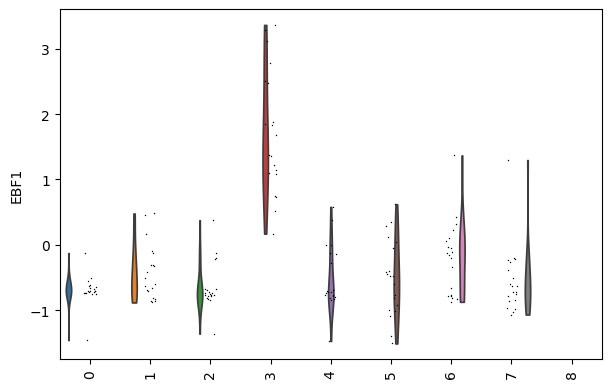

In [14]:
sc.pl.violin(acts, keys=['EBF1'], groupby='seurat_clusters', rotation=90)